In [6]:
# This notebook analyses the ouput of 
# running complexity.py

# grep 'for_parser:' complexity_PM.txt | sed 's/for_parser:,//g' | sed '1 i\cityname,i_o_length,prediction_horizon,grid_size,thresh,cx_sample_whole_data,cx_sample_single_point,CSR_PM_frac, CSR_PM_count'
# The above shell must be run and saved to PM.csvCSR_PM_frac

In [39]:
# ! grep 'for_parser:' t | sed 's/for_parser:,//g' > PM_scales_london_processed_exp.csv

In [48]:
# ! grep 'for_parser:' t | sed 's/for_parser:,//g' > PM_scales_all_cities_exp.csv # cityname,i_o_length,prediction_horizon,grid_size,thresh,cx_sample_whole_data,cx_sample_single_point,CSR_PM_frac,CSR_PM_count,CSR_PM_no_thresh_median,CSR_PM_no_thresh_mean,CSR_PM_no_thresh_frac_median,CSR_PM_no_thresh_frac_mean,CSR_PM_no_thresh_median_exp,CSR_PM_no_thresh_mean_exp,CSR_PM_no_thresh_frac_median_exp,CSR_PM_no_thresh_frac_mean_exp,CSR_PM_no_thresh_mean_exp_minus_1,CSR_PM_no_thresh_median_exp_minus_1,

In [35]:
import sys

sys.path.append("../")
import config

import numpy as np
import matplotlib.pyplot as plt
from smartprint import smartprint as sprint

In [36]:
config.scales

[25, 35, 45, 55, 65, 75, 85, 95]

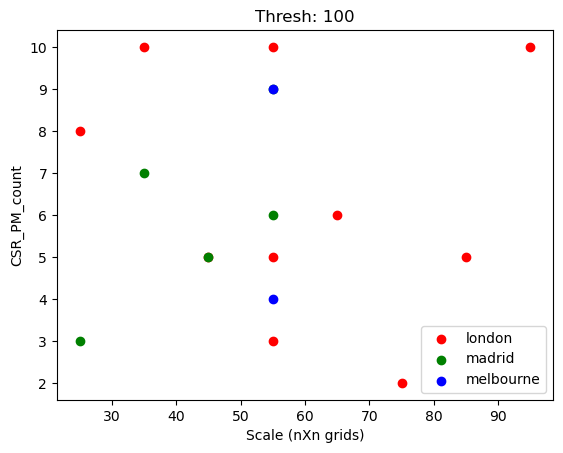

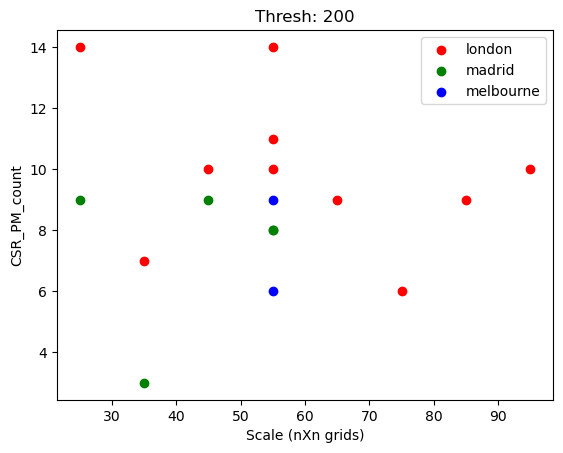

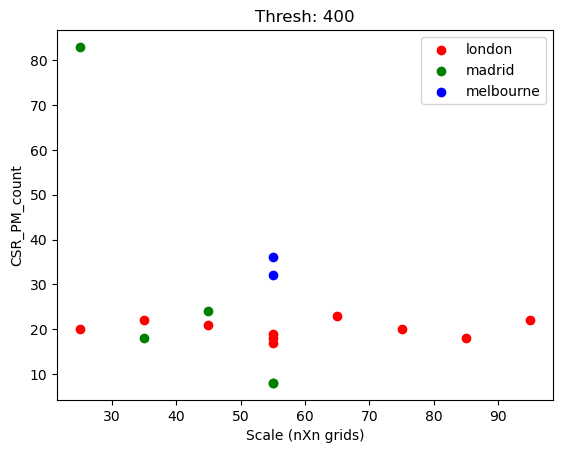

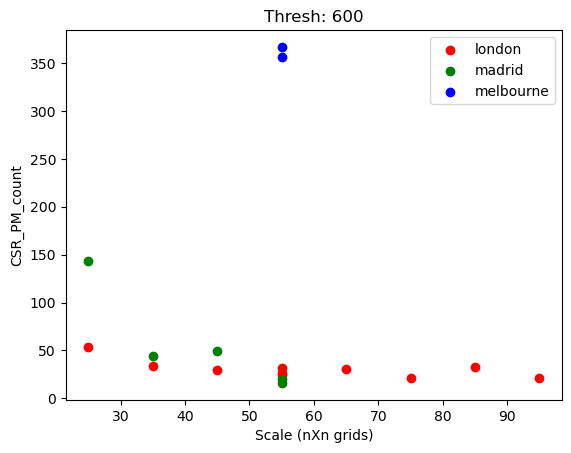

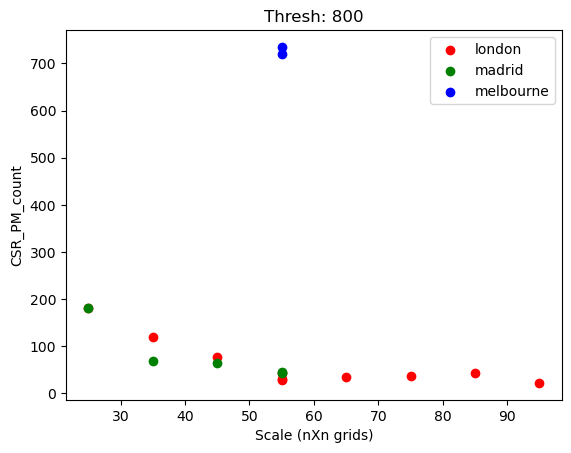

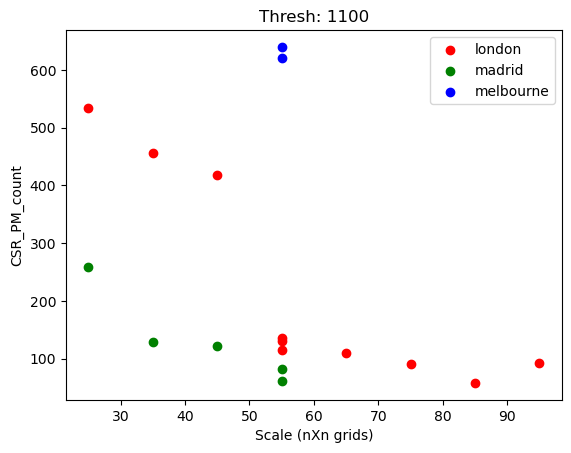

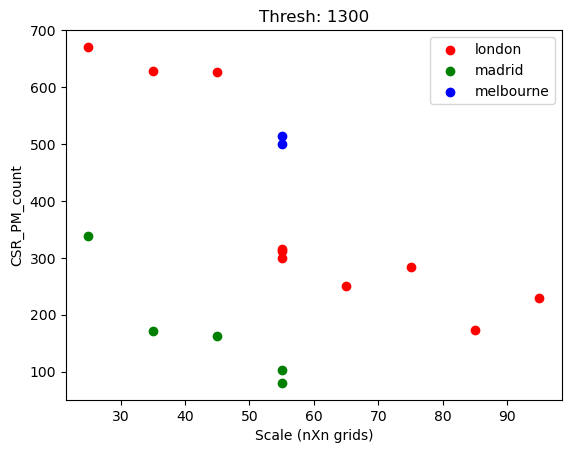

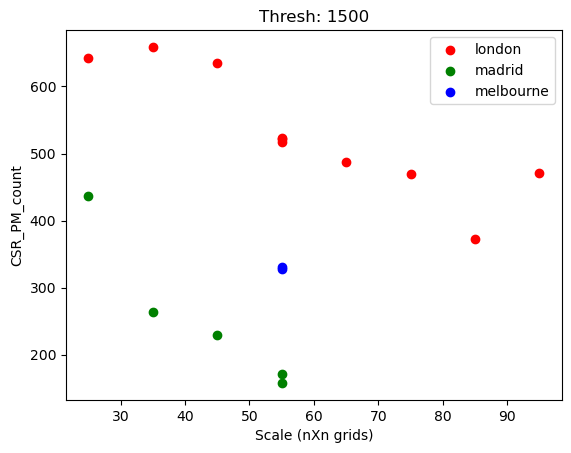

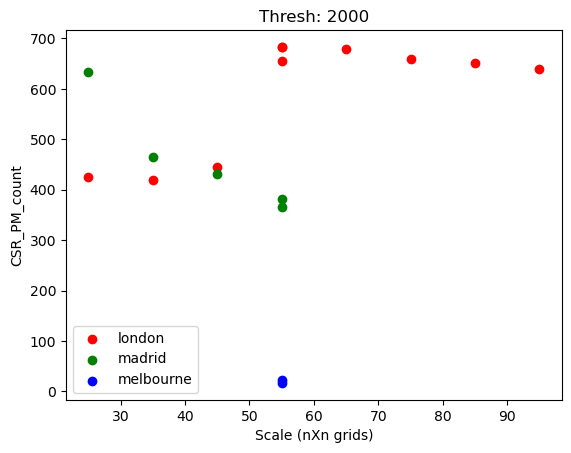

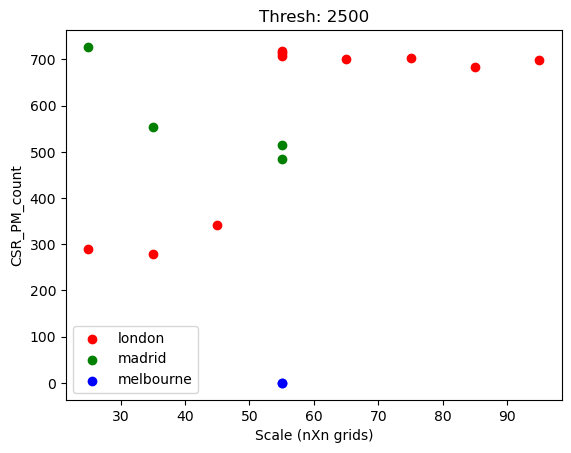

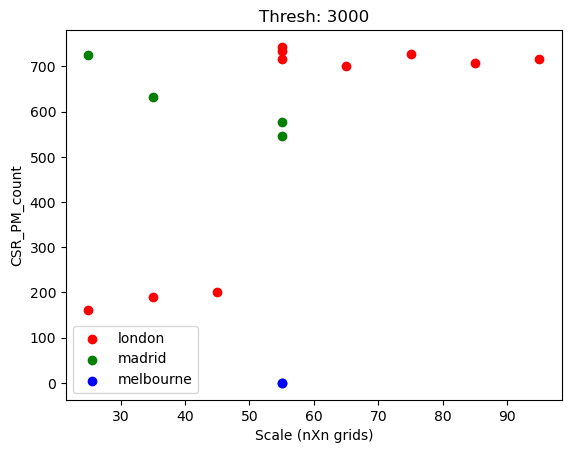

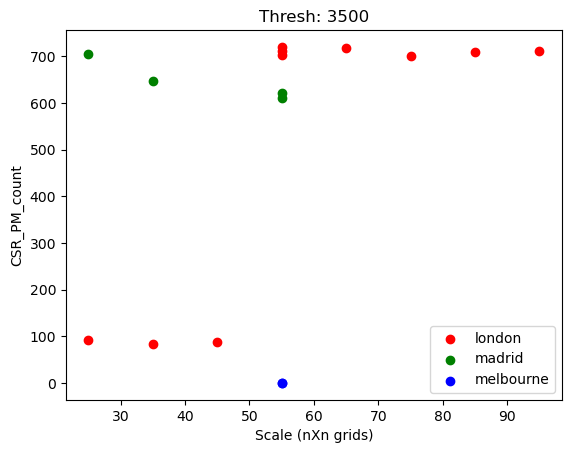

In [50]:
import pandas as pd
df = pd.read_csv("PM_scales_london_processed.csv")

city_color = {"london" : "red", 
             "melbourne": "blue",
             "madrid": "green"}
df.head()

# scales

for thresh in [100, 200, 400, 600, 800, 1100, 1300, 1500, 2000, 2500, 3000, 3500]:

    for city in config.city_list:

        cityname = city.lower()

        city_label_printed = []

        for scale in config.scales:
            for i_o_length in config.i_o_lengths_def:
                for pred_horiz in config.pred_horiz_def:
                    filtered_rows = df[    \
                                       (df["i_o_length"]==i_o_length) & \
                                       (df["grid_size"]==scale) & \
                                       (df["prediction_horizon"]==pred_horiz) &\
                                       (df["cityname"]==cityname) &\
                                       (df["thresh"]==thresh)
                                      ]

                    if filtered_rows.shape[0] == 1:
                        range_ = [0]
                    else:
                        range_ = list(range(filtered_rows.shape[0]))
                        # sprint (cityname, scale, i_o_length, pred_horiz, filtered_rows.shape)
                        # no worries, will be plotted multiple times # this is three times because of first combination overlap


                    for i in range_:
                        if cityname in city_label_printed:
                            plt.scatter(scale, filtered_rows.iloc[i].CSR_PM_count, color=city_color[cityname])
                        else:
                            plt.scatter(scale, filtered_rows.iloc[i].CSR_PM_count, color=city_color[cityname], label=cityname)
                            city_label_printed.append(cityname)

    plt.title("Thresh: " + str(thresh))
    plt.xlabel("Scale (nXn grids)")
    plt.ylabel("CSR_PM_count")
    plt.legend()
    plt.show()
    
    

In [51]:
import pandas as pd
df = pd.read_csv("PM_scales_all_cities_exp.csv")

city_color = {"london" : "red", 
             "melbourne": "blue",
             "madrid": "green"}
df.head()


,cityname,i_o_length,prediction_horizon,grid_size,thresh,cx_sample_whole_data,cx_sample_single_point,CSR_PM_frac,CSR_PM_count,CSR_PM_no_thresh_median,CSR_PM_no_thresh_mean,CSR_PM_no_thresh_frac_median,CSR_PM_no_thresh_frac_mean,CSR_PM_no_thresh_median_exp,CSR_PM_no_thresh_mean_exp,CSR_PM_no_thresh_frac_median_exp,CSR_PM_no_thresh_frac_mean_exp,CSR_PM_no_thresh_mean_exp_minus_1,CSR_PM_no_thresh_median_exp_minus_1
0,madrid,4,1,25,100,1500,200,NaN,NaN,1220.0,1227.577127,0.972186,1.241135,0.747700,0.756983,0.941754,0.928133,0.243017,0.252300
1,madrid,4,1,35,100,1500,200,NaN,NaN,1564.0,1679.769862,0.994975,1.301666,0.905549,0.900433,0.979905,0.974228,0.099567,0.094451
2,madrid,4,1,45,100,1500,200,NaN,NaN,1903.0,2104.312566,0.967844,1.178699,0.927424,0.922274,0.957732,0.949640,0.077726,0.072576
3,madrid,4,1,55,100,1500,200,NaN,NaN,2829.0,3176.757085,0.992908,1.232128,0.894039,0.885637,0.973676,0.967867,0.114363,0.105961
4,madrid,4,1,65,100,1500,200,NaN,NaN,2772.0,4132.713217,0.979798,1.153135,0.972660,0.962754,0.984368,0.981769,0.037246,0.027340


In [55]:
df.columns

Index(['cityname', 'i_o_length', 'prediction_horizon', 'grid_size', 'thresh',
       'cx_sample_whole_data', 'cx_sample_single_point', 'CSR_PM_frac',
       'CSR_PM_count', 'CSR_PM_no_thresh_median', 'CSR_PM_no_thresh_mean',
       'CSR_PM_no_thresh_frac_median', 'CSR_PM_no_thresh_frac_mean',
       'CSR_PM_no_thresh_median_exp', 'CSR_PM_no_thresh_mean_exp',
       'CSR_PM_no_thresh_frac_median_exp', 'CSR_PM_no_thresh_frac_mean_exp',
       'CSR_PM_no_thresh_mean_exp_minus_1',
       'CSR_PM_no_thresh_median_exp_minus_1'],
      dtype='object')

In [74]:
df[(df["i_o_length"] == 4) & (df["cityname"] == "london") & (df["prediction_horizon"] == 1) & (df["grid_size"] == 25)]

,cityname,i_o_length,prediction_horizon,grid_size,thresh,cx_sample_whole_data,cx_sample_single_point,CSR_PM_frac,CSR_PM_count,CSR_PM_no_thresh_median,CSR_PM_no_thresh_mean,CSR_PM_no_thresh_frac_median,CSR_PM_no_thresh_frac_mean,CSR_PM_no_thresh_median_exp,CSR_PM_no_thresh_mean_exp,CSR_PM_no_thresh_frac_median_exp,CSR_PM_no_thresh_frac_mean_exp,CSR_PM_no_thresh_mean_exp_minus_1,CSR_PM_no_thresh_median_exp_minus_1
18,london,4,1,25,100,1500,200,NaN,NaN,936.0,887.946697,0.976798,1.136829,0.770829,0.785977,0.915376,0.903821,0.214023,0.229171


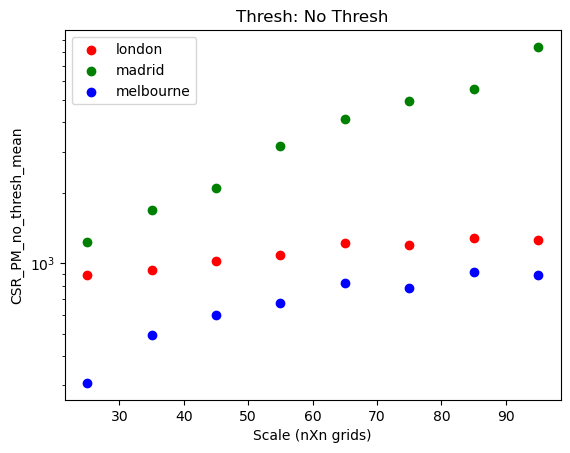

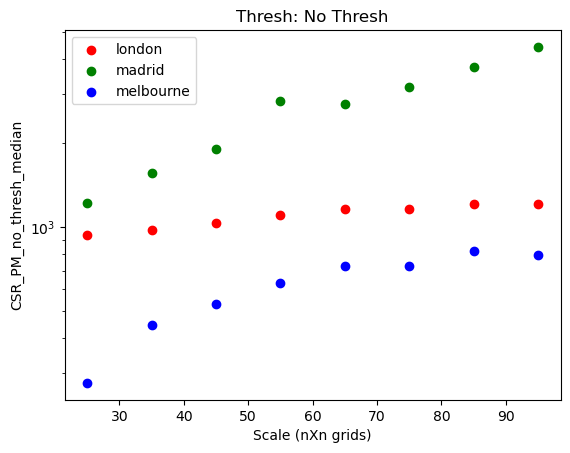

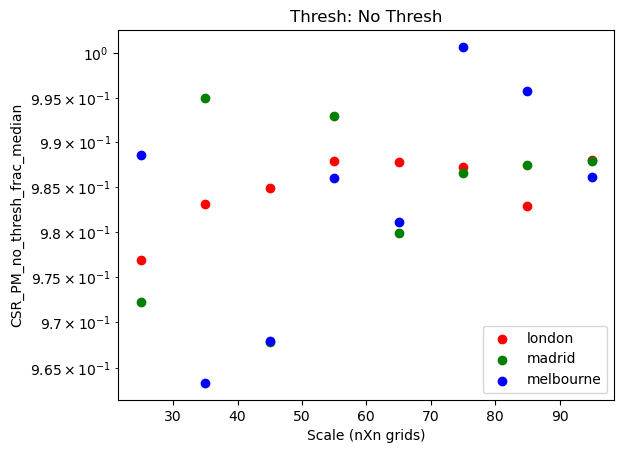

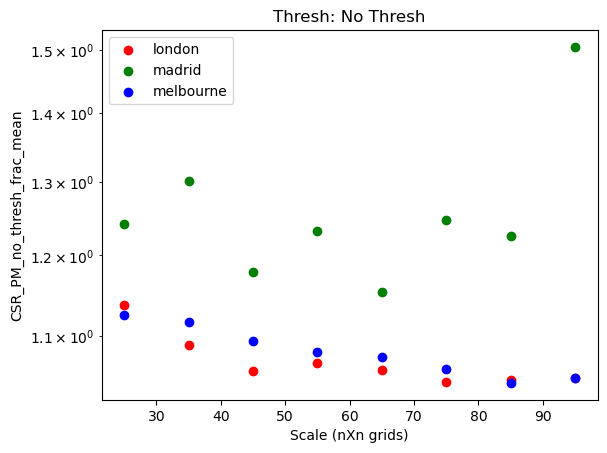

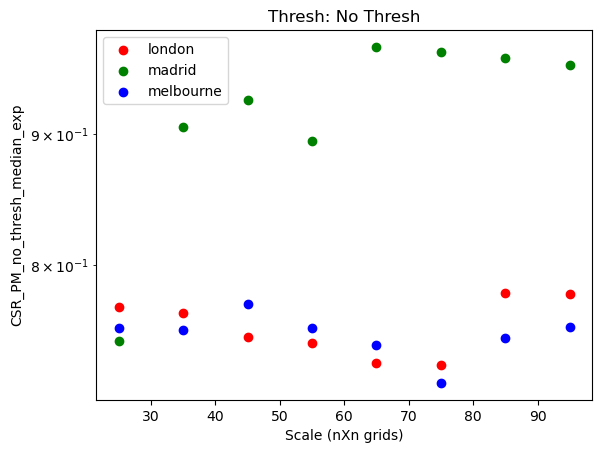

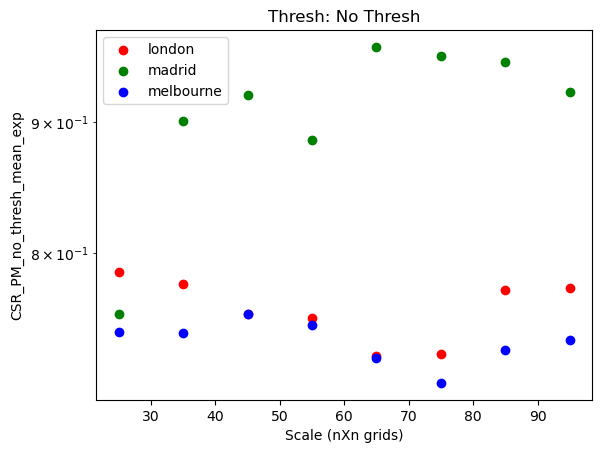

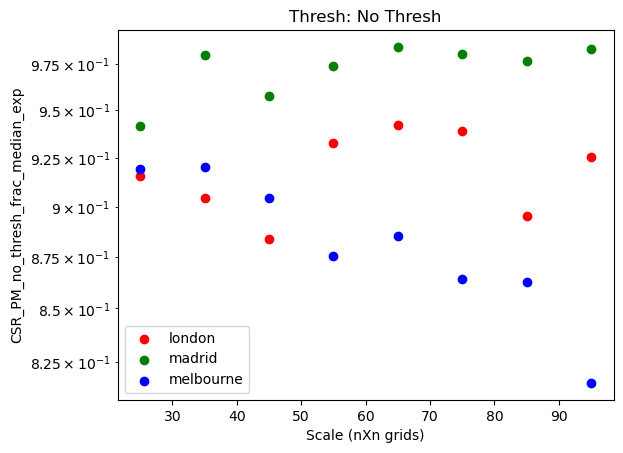

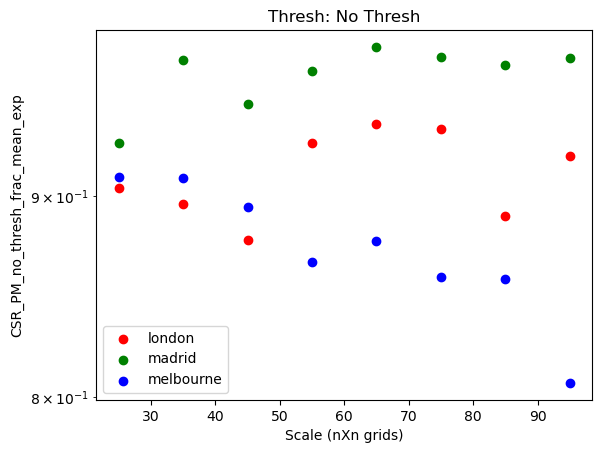

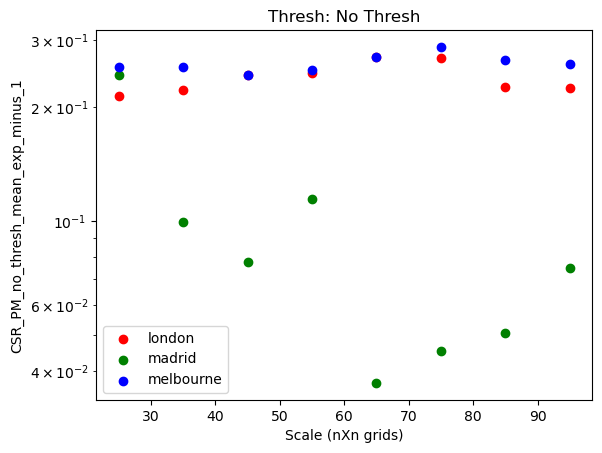

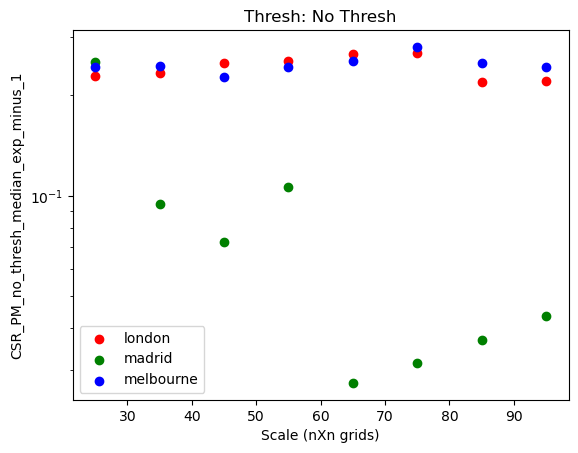

In [79]:

# scales

for CSR_type in ['CSR_PM_no_thresh_mean','CSR_PM_no_thresh_median',
       'CSR_PM_no_thresh_frac_median', 'CSR_PM_no_thresh_frac_mean',
       'CSR_PM_no_thresh_median_exp', 'CSR_PM_no_thresh_mean_exp',
       'CSR_PM_no_thresh_frac_median_exp', 'CSR_PM_no_thresh_frac_mean_exp',
       'CSR_PM_no_thresh_mean_exp_minus_1',
       'CSR_PM_no_thresh_median_exp_minus_1']:

    for city in config.city_list:

        cityname = city.lower()

        city_label_printed = []

        for scale in config.scales:
            for i_o_length in [4]:
                for pred_horiz in [1]:
                    filtered_rows = df[    \
                                       (df["i_o_length"]==i_o_length) & \
                                       (df["grid_size"]==scale) & \
                                       (df["prediction_horizon"]==pred_horiz) &\
                                       (df["cityname"]==cityname)
                                      ]
                    # print (filtered_rows)
                    if filtered_rows.shape[0] == 1:
                        range_ = [0]
                    else:
                        range_ = list(range(filtered_rows.shape[0]))
                        # sprint (cityname, scale, i_o_length, pred_horiz, filtered_rows.shape)
                        # no worries, will be plotted multiple times # this is three times because of first combination overlap

                    # print (filtered_rows)

                    for i in range_:
                        if cityname in city_label_printed:
                            plt.scatter(scale, filtered_rows.iloc[i][CSR_type], color=city_color[cityname])
                        else:
                            plt.scatter(scale, filtered_rows.iloc[i][CSR_type], color=city_color[cityname], label=cityname)
                            city_label_printed.append(cityname)

    plt.title("Thresh: No Thresh")
    plt.xlabel("Scale (nXn grids)")
    plt.ylabel(CSR_type)
    plt.yscale('log')
    plt.legend()
    plt.show()
    


In [64]:
filtered_rows

,cityname,i_o_length,prediction_horizon,grid_size,thresh,cx_sample_whole_data,cx_sample_single_point,CSR_PM_frac,CSR_PM_count,CSR_PM_no_thresh_median,CSR_PM_no_thresh_mean,CSR_PM_no_thresh_frac_median,CSR_PM_no_thresh_frac_mean,CSR_PM_no_thresh_median_exp,CSR_PM_no_thresh_mean_exp,CSR_PM_no_thresh_frac_median_exp,CSR_PM_no_thresh_frac_mean_exp,CSR_PM_no_thresh_mean_exp_minus_1,CSR_PM_no_thresh_median_exp_minus_1


In [61]:
a = "CSR_PM_no_thresh_mean_exp"
df[a]

0     0.756983
1     0.900433
2     0.922274
3     0.885637
4     0.962754
5     0.954808
6     0.949548
7     0.924828
8     0.931557
9     0.744959
10    0.744232
11    0.757003
12    0.749993
13    0.728063
14    0.711605
15    0.732876
16    0.739486
17    0.736777
18    0.785977
19    0.777638
20    0.757088
21    0.754570
22    0.728918
23    0.730286
24    0.773497
25    0.775237
26    0.765996
Name: CSR_PM_no_thresh_mean_exp, dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


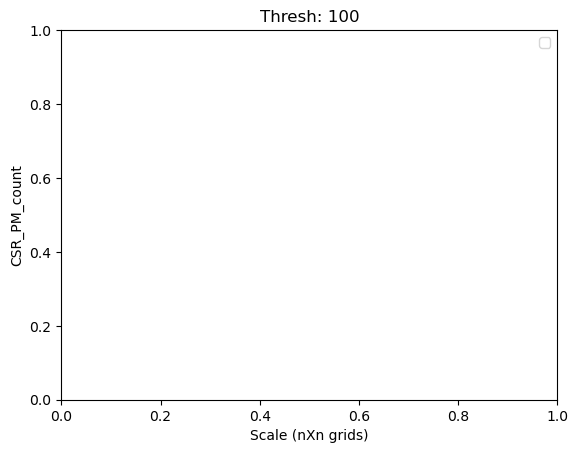

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


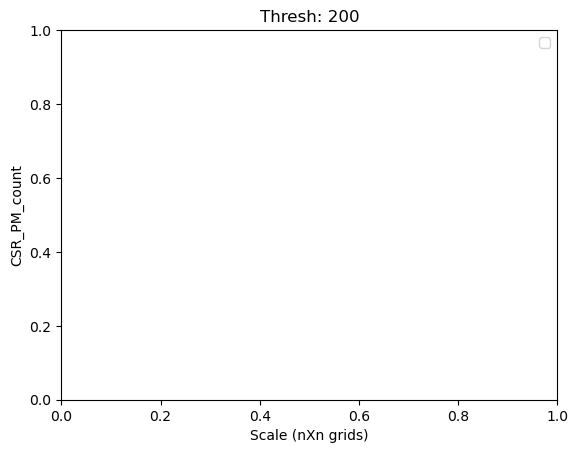

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


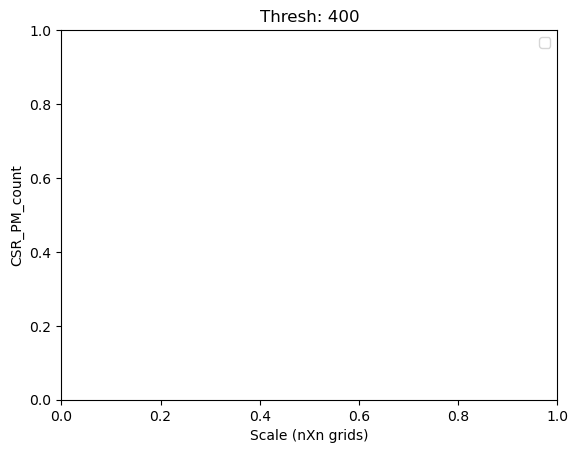

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


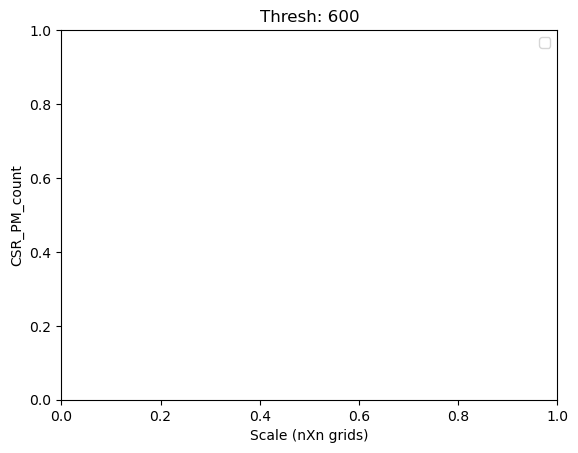

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


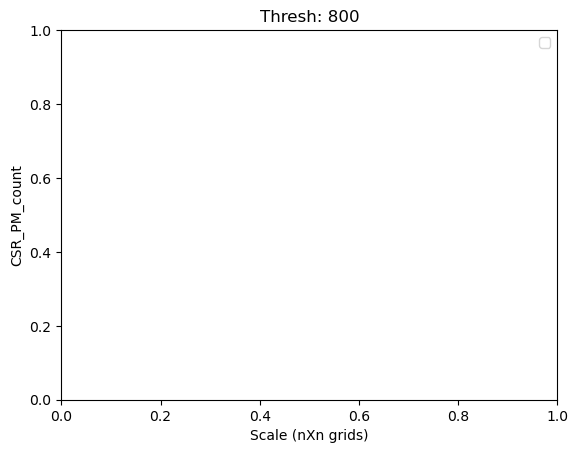

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


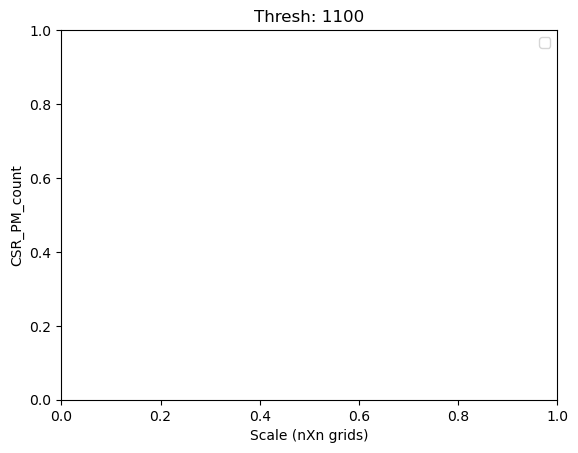

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


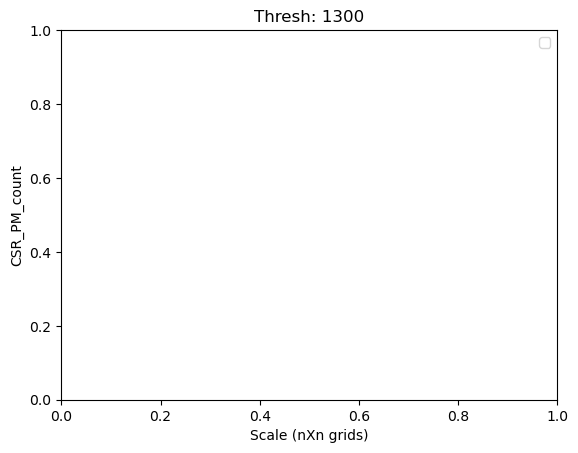

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


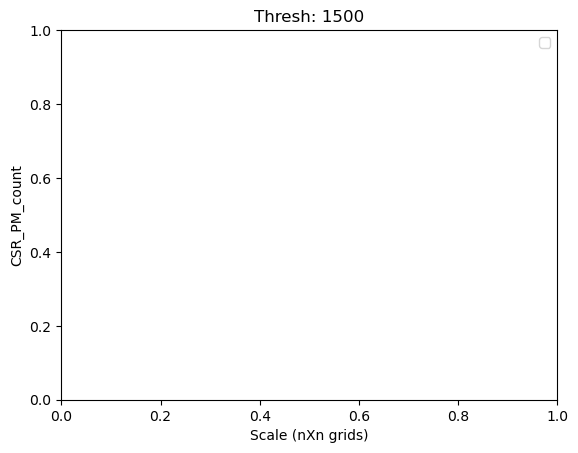

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


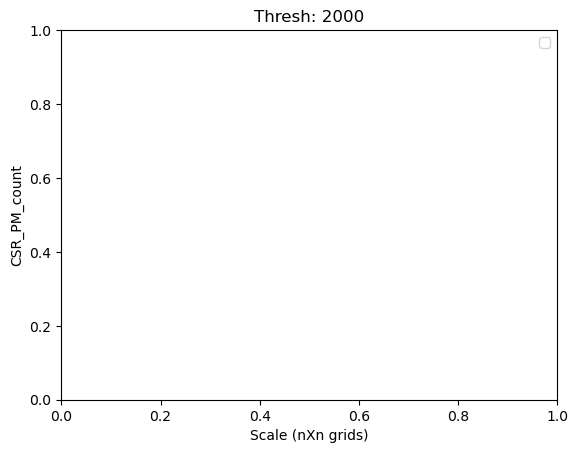

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


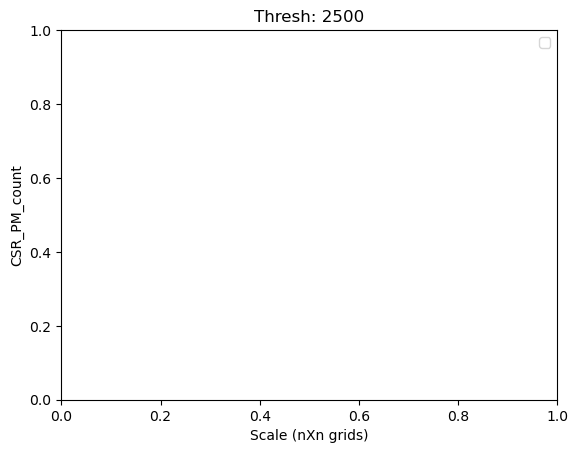

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


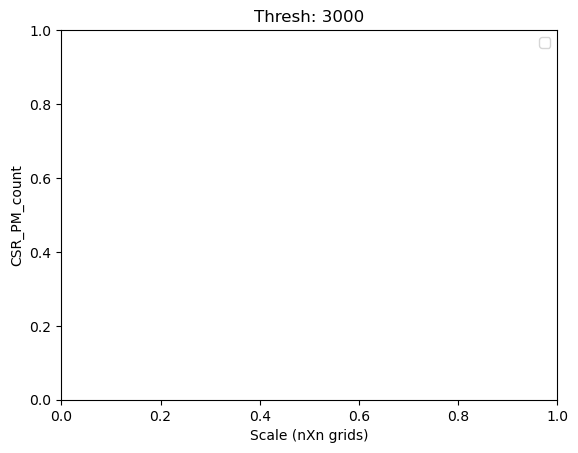

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


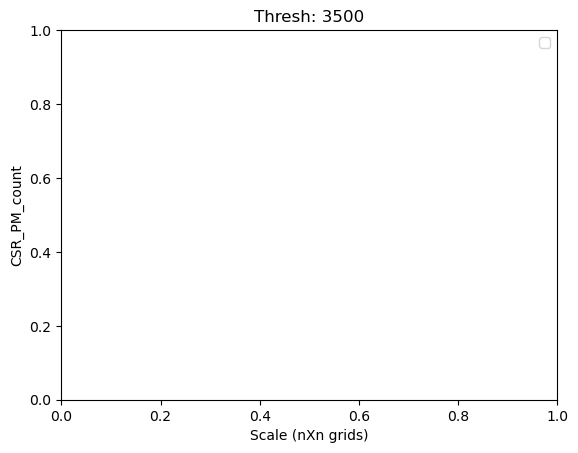

In [54]:

for thresh in [100, 200, 400, 600, 800, 1100, 1300, 1500, 2000, 2500, 3000, 3500]:

    for city in ["london"]: # config.city_list:

        cityname = city.lower()

        city_label_printed = []

        for scale in [25, 35, 45, 55, 65, 75, 85, 105]:
            for i_o_length in [1]:
                for pred_horiz in [4]:
                    filtered_rows = df[    \
                                       (df["i_o_length"]==i_o_length) & \
                                       (df["grid_size"]==scale) & \
                                       (df["prediction_horizon"]==pred_horiz) &\
                                       (df["cityname"]==cityname) &\
                                       (df["thresh"]==thresh)
                                      ]
                    # print (filtered_rows)
                    if filtered_rows.shape[0] == 1:
                        range_ = [0]
                    else:
                        range_ = list(range(filtered_rows.shape[0]))
                        # sprint (cityname, scale, i_o_length, pred_horiz, filtered_rows.shape)
                        # no worries, will be plotted multiple times # this is three times because of first combination overlap


                    for i in range_:
                        if cityname in city_label_printed:
                            plt.scatter(scale, filtered_rows.iloc[i].CSR_PM_count, color=city_color[cityname])
                        else:
                            plt.scatter(scale, filtered_rows.iloc[i].CSR_PM_count, color=city_color[cityname], label=cityname)
                            city_label_printed.append(cityname)

    plt.title("Thresh: " + str(thresh))
    plt.xlabel("Scale (nXn grids)")
    plt.ylabel("CSR_PM_count")
    plt.legend()
    plt.show()
    
    